# Zárthelyi dolgozat

* Másold le a dokumentumot a megszokott módon és nevezd át, úgy, hogy az
tartalmazza a nevedet és a Neptun-kódodat (Vezetknév_Keresztnév-NEPTUNKÓD)!
Miután átnevezted, oszd meg a dokumentumot velem (`rifarkas@gmail.com`) szerkesztési joggal!

* A zárthelyi megírásához használhattok bármilyen segédanyagot, kivéve egymást. Se online, se offline!
* Csak az órai notebookokban használt módszereket (library, osztály, függvény, stb) fogadom el a megoldásban!
* Kérlek benneteket, hogy ahol csak lehetséges, legjobb tudomásotok szerint kommentezzétek fel a kódot, illetve a feladatokra válaszoljatok szövegesen is (1 mondat).




# 1/A feladat

Készítsd elő az alábbi adatbázist, hogy gépi tanulási kísérletek végrehajtására alkalmas legyen!
A célváltozó az utolsó oszlop, a `stroke`.

 https://raw.githubusercontent.com/levotvos/datascience_2024/refs/heads/main/healthcare-dataset-stroke-data.csv

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/levotvos/datascience_2024/refs/heads/main/healthcare-dataset-stroke-data.csv')
df = df.dropna()

df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
X = df.drop(columns=['stroke'])
y = df['stroke']

print(df.head())


      id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1             228.69  36.6       1   
2  31112  80.0             0              1             105.92  32.5       1   
3  60182  49.0             0              0             171.23  34.4       1   
4   1665  79.0             1              0             174.12  24.0       1   
5  56669  81.0             0              0             186.21  29.0       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   
5         True         False              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0    

# 1/B feladat

Azt szeretnénk minél jobban megjósolni, hogy sztrókot kaphat-e egy adott személy, bizonyos egészségügyi adatai alapján. Hajts végre gépi tanulási kísérletet legalább két különböző fajta modellel!

*Az elsődleges szempont legyen számunkra, hogy inkább előnyben részesítsük azt, hogy ha sztrókot jóslunk, de mégsem áll fenn, minthogy egészségesnek mondjunk egy pácienst, úgy hogy sztrókot kaphat. Igyekezzünk azonban a minél jobb precizitás elérésére is, az egészségügyi költségek miatt.*

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.under_sampling import NearMiss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

nm = NearMiss()
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

logreg = LogisticRegression(max_iter=5000, class_weight='balanced', solver='liblinear', random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regresszió (liblinear solver):")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

dtree = DecisionTreeClassifier(max_depth=7, class_weight='balanced', random_state=42)
dtree.fit(X_train_resampled, y_train_resampled)
y_pred_dtree = dtree.predict(X_test)

print("\nDöntési Fa:")
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

f1_logreg = f1_score(y_test, y_pred_logreg)
f1_dtree = f1_score(y_test, y_pred_dtree)

print(f"\nF1-score (Logistic Regresszió): {f1_logreg:.2f}")
print(f"F1-score (Döntési Fa): {f1_dtree:.2f}")


Logisztikus Regresszió (liblinear solver):
[[965 445]
 [ 17  46]]
              precision    recall  f1-score   support

           0       0.98      0.68      0.81      1410
           1       0.09      0.73      0.17        63

    accuracy                           0.69      1473
   macro avg       0.54      0.71      0.49      1473
weighted avg       0.94      0.69      0.78      1473


Döntési Fa:
[[1058  352]
 [  27   36]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1410
           1       0.09      0.57      0.16        63

    accuracy                           0.74      1473
   macro avg       0.53      0.66      0.50      1473
weighted avg       0.94      0.74      0.82      1473


F1-score (Logisztikus Regresszió): 0.17
F1-score (Döntési Fa): 0.16


# 1/C fealdat

Melyik lett a legerősebb/leghasznosabb jellemző az 1/B feladatban használt modellek valamelyikének? (elég ha egy modellre megcsinálod)

Legerősebb jellemzők a Logistic Regresszióban:
bmi: 0.1113
hypertension: 0.0695
age: 0.0428
work_type_Private: 0.0385
heart_disease: 0.0347
ever_married_Yes: 0.0309
work_type_children: 0.0293
smoking_status_never smoked: 0.0287
smoking_status_formerly smoked: 0.0147
gender_Male: 0.0129


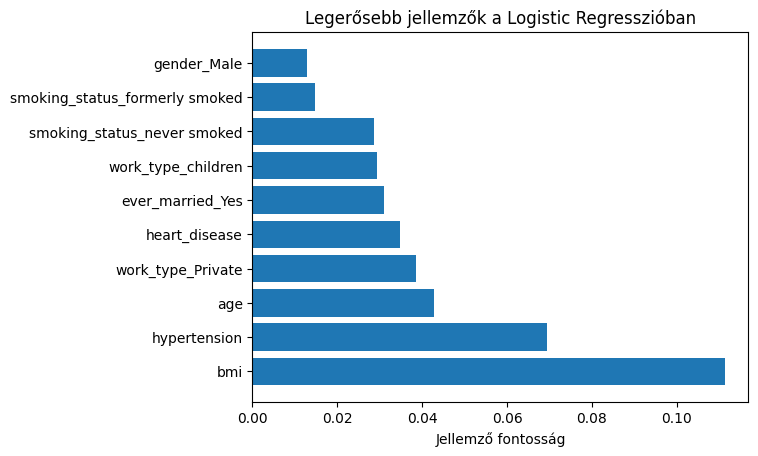

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_importance = np.abs(logreg.coef_[0])

sorted_idx = np.argsort(feature_importance)[::-1]

feature_names = X.columns
top_features = feature_names[sorted_idx]

print("Legerősebb jellemzők a Logistic Regresszióban:")
for i in range(10):
    print(f"{top_features[i]}: {feature_importance[sorted_idx[i]]:.4f}")

plt.barh(top_features[:10], feature_importance[sorted_idx][:10])
plt.xlabel('Jellemző fontosság')
plt.title('Legerősebb jellemzők a Logistic Regresszióban')
plt.show()

# 2 feladat

Hajts végre paraméter hangolást az 1/B feladatban használt modellek valamelyikén! El tudtál érni jobb eredményeket így, mint az 1/B-ben? (elég ha egy modellre megcsinálod)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000],
    'solver': ['liblinear'],
}

logreg = LogisticRegression(class_weight='balanced', random_state=42)

clf = GridSearchCV(logreg, parameters, cv=3, scoring=make_scorer(f1_score, pos_label=1), verbose=3)
clf.fit(X_train_resampled, y_train_resampled)

best_params = clf.best_params_
best_score = clf.best_score_
print("Legjobb paraméterek:", best_params)
print("Legjobb pontszám (cross-validation):", best_score)

y_pred_best = clf.predict(X_test)
print("\nLogisztikus Regresszió (hangolt paraméterek):")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

f1_best = f1_score(y_test, y_pred_best)
print(f"\nF1-score (Legjobb modell): {f1_best:.2f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END C=0.001, max_iter=1000, solver=liblinear;, score=0.717 total time=   0.0s
[CV 2/3] END C=0.001, max_iter=1000, solver=liblinear;, score=0.667 total time=   0.0s
[CV 3/3] END C=0.001, max_iter=1000, solver=liblinear;, score=0.686 total time=   0.0s
[CV 1/3] END C=0.001, max_iter=5000, solver=liblinear;, score=0.717 total time=   0.0s
[CV 2/3] END C=0.001, max_iter=5000, solver=liblinear;, score=0.667 total time=   0.0s
[CV 3/3] END C=0.001, max_iter=5000, solver=liblinear;, score=0.686 total time=   0.0s
[CV 1/3] END C=0.01, max_iter=1000, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/3] END C=0.01, max_iter=1000, solver=liblinear;, score=0.673 total time=   0.0s
[CV 3/3] END C=0.01, max_iter=1000, solver=liblinear;, score=0.680 total time=   0.0s
[CV 1/3] END C=0.01, max_iter=5000, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/3] END C=0.01, max_iter=5000, solver=liblinear;, score=0.673 total 

# 3/A feladat

Listázd ki a negyedik (3-as indexű) szöveges értékeléshez (`Review Text`) 4 darab leghasonlóbb értékelést az adatbázisból!

**Megjegyzés:** előfordulhat, hogy túlságosan nagy a jellemző mátrix mérete, így a tanításnál kifuthatsz a memóriából és/vagy nagyon sokáig fut a tanulás. Ha ilyenbe futnál bele, nézd át a jellemzőkinyerő osztály konstruktorának argumentumait, hogy kisebb jellemző mátrixot kapj.

https://raw.githubusercontent.com/levotvos/datascience_2024/refs/heads/main/clothing_reviews.csv

In [ ]:
from gensim.models import Word2Vec
import re

url = "https://raw.githubusercontent.com/levotvos/datascience_2024/refs/heads/main/clothing_reviews.csv"
df = pd.read_csv(url)

df = df.dropna(subset=["Review Text"])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned_text'] = df['Review Text'].apply(preprocess_text)

tokenized_texts = df['cleaned_text'].apply(str.split)

word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

def compute_doc_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

df['doc_vector'] = tokenized_texts.apply(lambda x: compute_doc_vector(x, word2vec_model))

def cosine_similarity_manual(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    if norm_v1 == 0 or norm_v2 == 0:
        return 0
    return dot_product / (norm_v1 * norm_v2)

query_index = 3
query_vector = df.iloc[query_index]['doc_vector']

df['similarity'] = df['doc_vector'].apply(lambda x: cosine_similarity_manual(query_vector, x))

similar_indices = df.sort_values(by='similarity', ascending=False).index[1:5]
similar_texts = df.iloc[similar_indices]["Review Text"]

print(f"Az {query_index}. értékeléshez leginkább hasonló szövegek:")
for i, text in enumerate(similar_texts, start=1):
    print(f"{i}. {text}")


Az 3. értékeléshez leginkább hasonló szövegek:
1. Very much in love with this ethereal, delicate dress. the silk is very light and slightly clingy, so take caution when wearing. the belt can be adjusted as modeled or you can get creative as there is length the play with. the liner finishes above the knee on me in medium petite. those of slender torsos and small busts may want to size down, otherwise tts. for reference i am 5'3" 36dd 140#
2. Nice quality, details, and i like the looser cut (works well on this blouse).
3. I love it! it's cute and short and shows off my legs. the material is thick and great quality, so great for the fall. the color is great for florida!!! brightness year round. it's fits perfectly. i purchased a 14 and it fits like a glove. i am going to wear with my booties and a jacket like the model. hey it works!!!
4. Wasn't too sure about this jacket when i got it in the mail - seemed a little boxy on - maybe a smaller size would've worked better but i want to be abl

# 3/B feladat

Old meg a 3/A feladát úgy, hogy dokumentum beágyazási vektorokat használsz!
Egy dokumentum beágyazási vektora a szavai beágyazás vektorának az átlaga.

Használd az alábbi kódrészleteket!

In [ ]:
for word in text.split():
    if word in static_word2vec.wv:  # Ellenőrzi, hogy a szóhoz tartozik-e vektor
        vectors.append(static_word2vec.wv[word])


NameError: name 'static_word2vec' is not defined

In [ ]:
if len(vectors) == 0:  # Ha nincs érvényes szó a szövegben
    return np.zeros(100)  # 100 dimenziós nullvektor
else:
    return np.mean(vectors, axis=0)  # Átlag a szavak vektorai alapján

SyntaxError: 'return' outside function (<ipython-input-38-bd8f641fb35a>, line 2)

# 4 feladat
Mi lenne a 3/A feladatra a predikció a negyedik reviewnak (3-as indexű sor) ha azt a huggingface `unsloth/Llama-3.2-1B` nagy nyelvi modell generálja (ami egy GPT típusú modell)!

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("unsloth/Llama-3.2-1B")
model = AutoModelForCausalLM.from_pretrained("unsloth/Llama-3.2-1B")

query_review = df.iloc[3]["Review Text"]

inputs = tokenizer(query_review, return_tensors="pt", max_length=512, truncation=True)

inputs["attention_mask"] = inputs["attention_mask"] if "attention_mask" in inputs else None
inputs["pad_token_id"] = tokenizer.eos_token_id

outputs = model.generate(inputs["input_ids"], max_length=150, num_return_sequences=1, no_repeat_ngram_size=2, temperature=0.7, do_sample=True)

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Eredeti szöveg:")
print(query_review)
print("\nGenerált szöveg:")
print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Eredeti szöveg:
I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!

Generált szöveg:
I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! it has a little bit of a swing to it and the waist is a bit snug so it does tend to show when you wear over a bikini or a tank top. but if you can pull it off, you look good! i love the way it comes in on the top to the bottom and i think it looks really cool! and it is so light weight, which is great for a summer day!
